In [3]:
data=read.csv('C:/Users/nguye/PC/vietnamese-sentiment-analysis/data_new.csv')
head(data)

X,model,data,preprocessing,text_embedding,lan_chay,accuracy_score,f1_score
20,svm,uit-vihsd,1,cv,1,0.8263,0.5337
21,svm,uit-vihsd,1,cv,2,0.8260,0.5592
22,svm,uit-vihsd,1,cv,3,0.8241,0.5452
23,svm,uit-vihsd,1,cv,4,0.8132,0.5500
24,svm,uit-vihsd,1,cv,5,0.8223,0.5323
120,svm,uit-vsmec,1,cv,1,0.5155,0.4827


H0:không có sự khác biệt giữa các model

H1: có sự khác biệt giữa các model

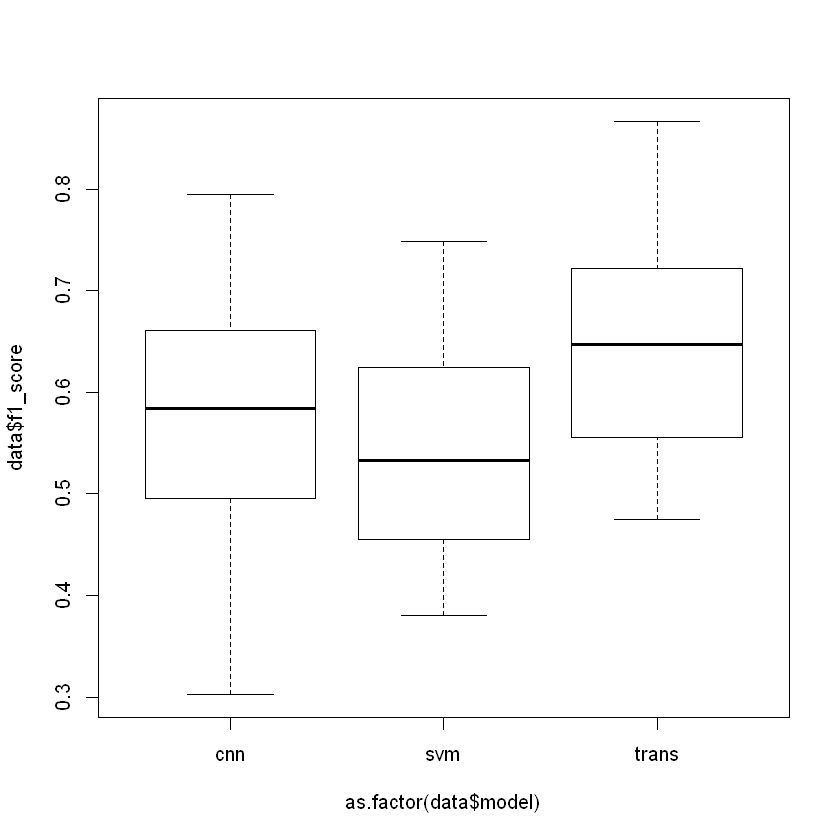

In [4]:
boxplot(data$f1_score ~ as.factor(data$model))

In [5]:
av=aov(data$f1_score ~ as.factor(data$model))
summary(av)

                       Df Sum Sq Mean Sq F value   Pr(>F)    
as.factor(data$model)   2  0.623 0.31139   27.62 9.98e-12 ***
Residuals             297  3.349 0.01127                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

dựa vào anova t thấy p<0.05 => bác bỏ H0 => có sự khác biệt giữa các model

In [6]:
TukeyHSD(av)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data$f1_score ~ as.factor(data$model))

$`as.factor(data$model)`
               diff         lwr         upr     p adj
svm-cnn   -0.037659 -0.07303027 -0.00228773 0.0338133
trans-cnn  0.072155  0.03678373  0.10752627 0.0000073
trans-svm  0.109814  0.07444273  0.14518527 0.0000000


bằng phân tích hậu định ta có 

model svm cho kết quả trung bình thấp hơn model cnn là 0.02 với p>0.05 => ko có ý nghĩa thống kê

model trans cho kết quả trung bình cao hơn model cnn là 0.07 với p<0.05 => có ý nghĩa thống kê

model trans cho kết quả trung bình cao hơn model svm là 0.09 với p<0.05 => có ý nghĩa thống kê

từ đây có thể thấy model trans cho hiệu suất tốt nhất so với svm và cnn

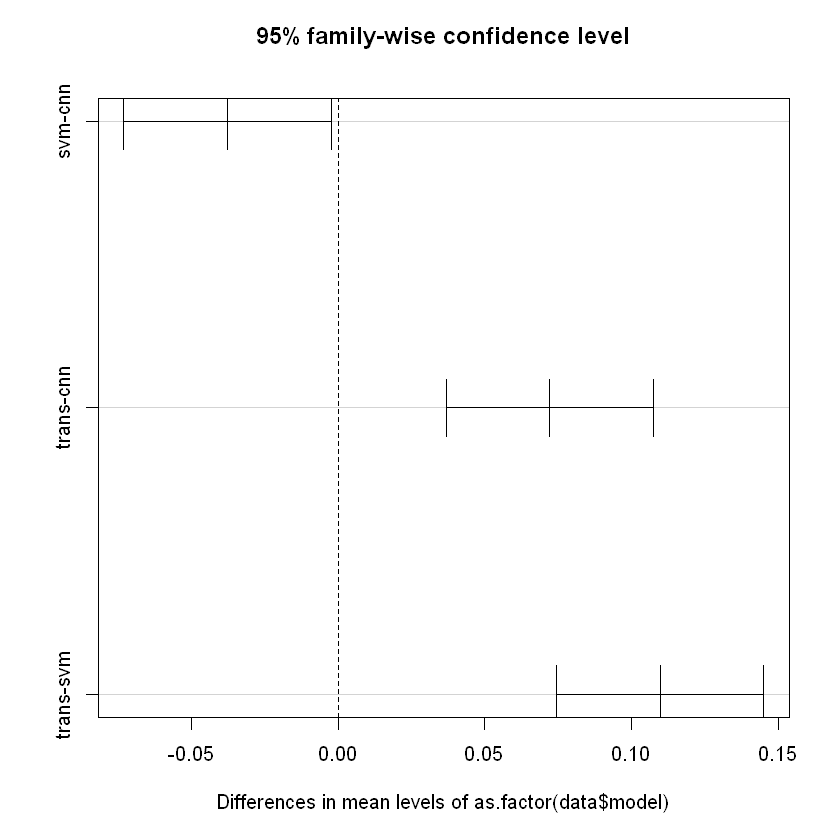

In [7]:
plot(TukeyHSD(av))

H0: ko có khác biệt nào giữa các pp embedding

H1: có sự khác biệt giữa các pp embedding

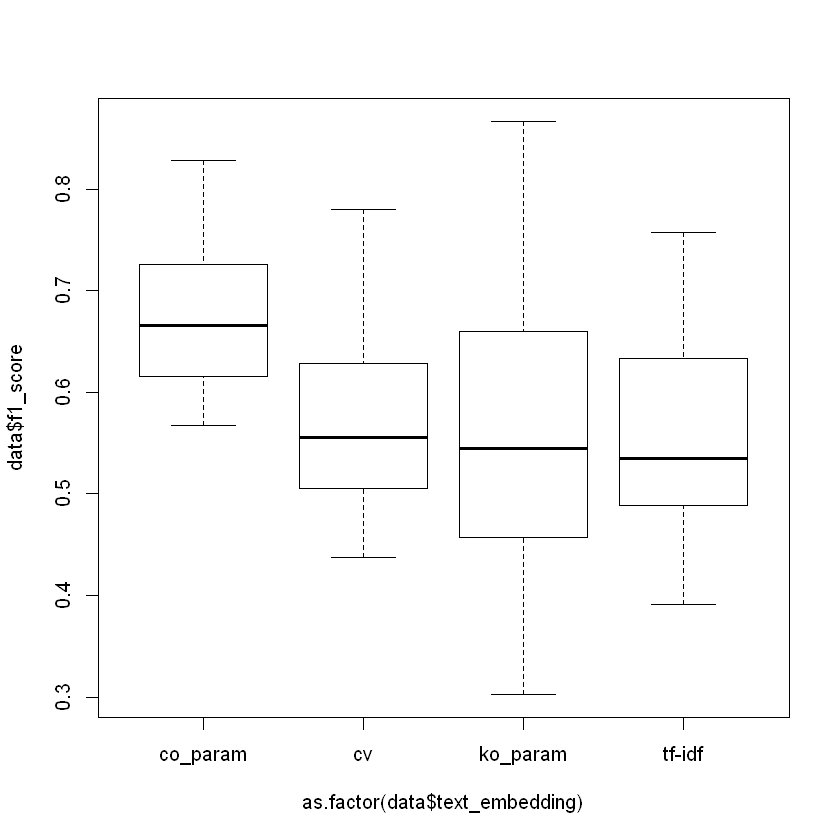

In [8]:
boxplot(data$f1_score ~ as.factor(data$text_embedding))

In [9]:
av=aov(data$f1_score ~ as.factor(data$text_embedding))
summary(av)

                                Df Sum Sq Mean Sq F value   Pr(>F)    
as.factor(data$text_embedding)   3  0.659 0.21960   19.62 1.25e-11 ***
Residuals                      296  3.312 0.01119                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

dựa vào anova t thấy p<0.05 => bác bỏ H0 => có sự khác biệt giữa các pp embedding

In [10]:
TukeyHSD(av)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data$f1_score ~ as.factor(data$text_embedding))

$`as.factor(data$text_embedding)`
                          diff         lwr         upr     p adj
cv-co_param       -0.095378667 -0.14001159 -0.05074575 0.0000004
ko_param-co_param -0.108014667 -0.15264759 -0.06338175 0.0000000
tf-idf-co_param   -0.116917333 -0.16155025 -0.07228441 0.0000000
ko_param-cv       -0.012636000 -0.05726892  0.03199692 0.8844027
tf-idf-cv         -0.021538667 -0.06617159  0.02309425 0.5975616
tf-idf-ko_param   -0.008902667 -0.05353559  0.03573025 0.9553817


dựa vào phân tích hậu định

pp cv cho kết quả trung bình thấp hơn co_param là 0.076, p<0.05 => có ý nghĩa thống kê

pp ko_param cho kết quả trung bình thấp hơn co_param là 0.075, p<0.05 => có ý nghĩa thống kê

pp tf_idf cho kết quả trung bình thấp hơn co_param là 0.094, p <0.05 => có nghĩa thống kê

=> pp co_param có hiệu suất tốt nhất

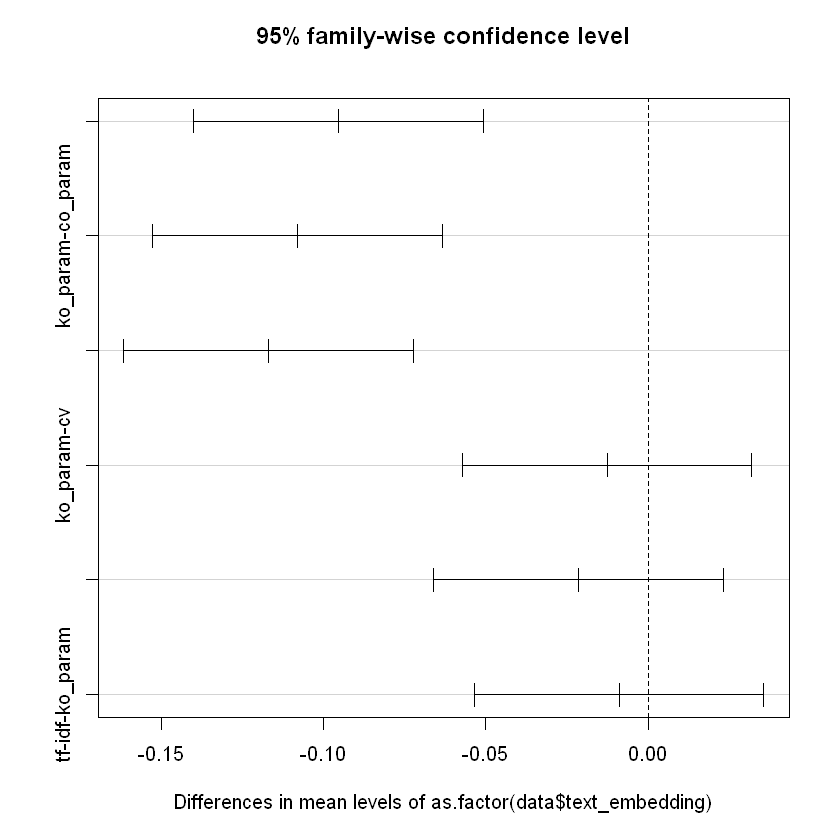

In [11]:
plot(TukeyHSD(av))

H0: không có sự khác biệt giữa preprocessing và ko preprocessing
H1: có sự khác biệt giữa preprocessing và ko preprocessing

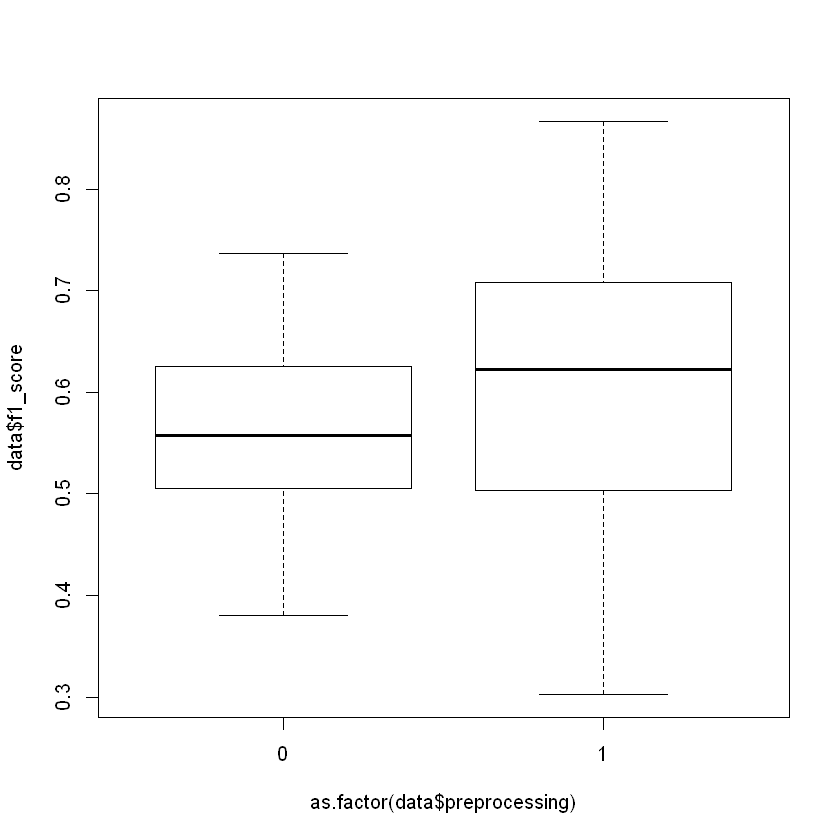

In [13]:
boxplot(data$f1_score ~ as.factor(data$preprocessing))

In [14]:
t.test(data$f1_score ~ as.factor(data$preprocessing))


	Welch Two Sample t-test

data:  data$f1_score by as.factor(data$preprocessing)
t = -4.5966, df = 297.85, p-value = 6.353e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07994468 -0.03201199
sample estimates:
mean in group 0 mean in group 1 
      0.5586567       0.6146350 


dựa vào t test, p<0.05 => có sự khác biệt giữa 2 nhóm

H0: preprocessing cho kết quả ko cao hơn là ko preprocessing

H1: preprocessing cho kết quả cao hơn

In [15]:
preprocessing_0=data[which(data[['preprocessing']]==0),]['f1_score']
preprocessing_1=data[which(data[['preprocessing']]==1),]['f1_score'] 

In [16]:
t.test(preprocessing_1,preprocessing_0,alterative='greater')



	Welch Two Sample t-test

data:  preprocessing_1 and preprocessing_0
t = 4.5966, df = 297.85, p-value = 6.353e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.03201199 0.07994468
sample estimates:
mean of x mean of y 
0.6146350 0.5586567 


dựa vào kiểm định t cho, p<0.05 => bác bỏ H0 => chấp nhận 

H1: preprocessing cho kết quả cao hơn